In [13]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,List,Annotated,Literal
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from pydantic import BaseModel,Field
import operator

load_dotenv()
model = ChatGoogleGenerativeAI(model='gemini-1.5-flash-latest')

In [14]:
class number(TypedDict):
    
    n : int
    max_iter : int

In [ ]:
def increase(state : number):
    return {'n' : state['n'] + 1,'max_iter' : state['max_iter'] + 1}

def evaluate(state : number) -> Literal['increase',END]:
    if state['n'] > 3:
        return END
    else:
        return 'increase'

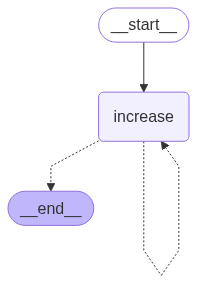

In [16]:
graph = StateGraph(number)

graph.add_node('increase',increase)


graph.add_edge(START,'increase')
graph.add_conditional_edges('increase',evaluate)

graph.compile()

In [19]:
workflow = graph.compile()

workflow.invoke({'n' : 3,'max_iter' : 0})

{'n': 4, 'max_iter': 1}